# Preprocessing

## Convert Categorical Data to Numerical (Encoding)


In [1]:
!pip install imbalanced-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

import xgboost as xgb
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\DELL\anaconda3\python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'pandas'

In [2]:
df = pd.read_csv('train_cleaned.csv')

In [7]:
# One-Hot Encoding of Nominal Data
df = pd.get_dummies(df, columns=['Gender', 'Ethnicity', 'Country_region',
                                          'Hotel_Type', 'Meal_Type', 'Deposit_type',
                                          'Booking_channel','Visted_Previously','Previous_Cancellations','Required_Car_Parking','Use_Promotion'], drop_first=True)

# Show the result
print(df.head())

   Reservation-id  Age Educational_Level       Income Expected_checkin  \
0        39428300   40       High-School         <25K       2015-07-01   
1        77491756   49       High-School  50K -- 100K       2015-07-01   
2        73747291   42           College         <25K       2015-07-02   
3        67301739   25       High-School        >100K       2015-07-02   
4        77222321   62              Grad    25K --50K       2015-07-03   

  Expected_checkout Booking_date  Adults  Children  Babies  ... Meal_Type_FB  \
0        2015-07-02   2015-05-21       4         2       0  ...        False   
1        2015-07-02   2015-05-26       1         3       0  ...        False   
2        2015-07-06   2015-06-29       1         3       0  ...        False   
3        2015-07-03   2015-06-20       3         3       0  ...        False   
4        2015-07-04   2015-06-20       1         1       0  ...        False   

   Meal_Type_HB  Deposit_type_Non-Refundable  Deposit_type_Refundable  \
0

## Ordinal Encoding for odinal data

In [8]:

# Make sure the 'Income' column is in a consistent format (strings)
df['Income'] = df['Income'].astype(str)

# Define the expected order of the categories
income_categories = ['<25K', '25K --50K', '50K -- 100K', '>100K']

# Initialize the OrdinalEncoder with the defined categories
encoder = OrdinalEncoder(categories=[income_categories])

# Fit and transform the 'Income' column
df['Income'] = encoder.fit_transform(df[['Income']])
df['Educational_Level'] = df['Educational_Level'].map({
    'Mid-School': 1,
    'College': 2,
    'High-School': 3,
    'Grad': 4
    })

df['Reservation_Status'] = df['Reservation_Status'].map({
    'check-out': 1,
    'canceled': 2,
    'no-show': 3,

    })

In [9]:
df.head()

,Reservation-id,Age,Educational_Level,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,...,Meal_Type_FB,Meal_Type_HB,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Direct,Booking_channel_Online,Visted_Previously_Yes,Previous_Cancellations_Yes,Required_Car_Parking_Yes,Use_Promotion_Yes
0,39428300,40,3,0.0,2015-07-01,2015-07-02,2015-05-21,4,2,0,...,False,False,False,False,False,True,False,False,True,True
1,77491756,49,3,2.0,2015-07-01,2015-07-02,2015-05-26,1,3,0,...,False,False,True,False,False,True,False,False,True,False
2,73747291,42,2,0.0,2015-07-02,2015-07-06,2015-06-29,1,3,0,...,False,False,False,True,False,True,False,False,True,False
3,67301739,25,3,3.0,2015-07-02,2015-07-03,2015-06-20,3,3,0,...,False,False,False,False,False,False,False,False,True,True
4,77222321,62,4,1.0,2015-07-03,2015-07-04,2015-06-20,1,1,0,...,False,False,False,True,True,False,False,False,False,True


In [10]:
df.shape

(26990, 35)

## Feature Engineering


In [11]:
df.columns

Index(['Reservation-id', 'Age', 'Educational_Level', 'Income',
       'Expected_checkin', 'Expected_checkout', 'Booking_date', 'Adults',
       'Children', 'Babies', 'Reservation_Status', 'Discount_Rate',
       'Room_Rate', 'stay_days', 'booking_lead', 'Total_Guests', 'Gender_M',
       'Ethnicity_Asian American', 'Ethnicity_Latino', 'Ethnicity_caucasian',
       'Country_region_North', 'Country_region_South', 'Country_region_West',
       'Hotel_Type_City Hotel', 'Hotel_Type_Resort', 'Meal_Type_FB',
       'Meal_Type_HB', 'Deposit_type_Non-Refundable',
       'Deposit_type_Refundable', 'Booking_channel_Direct',
       'Booking_channel_Online', 'Visted_Previously_Yes',
       'Previous_Cancellations_Yes', 'Required_Car_Parking_Yes',
       'Use_Promotion_Yes'],
      dtype='object')

In [12]:
df.drop(columns=["Reservation-id", "Expected_checkin", "Expected_checkout", "Booking_date"], inplace=True)


In [13]:
df.head()

,Age,Educational_Level,Income,Adults,Children,Babies,Reservation_Status,Discount_Rate,Room_Rate,stay_days,...,Meal_Type_FB,Meal_Type_HB,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Direct,Booking_channel_Online,Visted_Previously_Yes,Previous_Cancellations_Yes,Required_Car_Parking_Yes,Use_Promotion_Yes
0,40,3,0.0,4,2,0,1,0,106.440241,1,...,False,False,False,False,False,True,False,False,True,True
1,49,3,2.0,1,3,0,1,0,158.039564,1,...,False,False,True,False,False,True,False,False,True,False
2,42,2,0.0,1,3,0,1,0,212.610780,4,...,False,False,False,True,False,True,False,False,True,False
3,25,3,3.0,3,3,0,1,5,106.146407,1,...,False,False,False,False,False,False,False,False,True,True
4,62,4,1.0,1,1,0,1,10,159.384439,1,...,False,False,False,True,True,False,False,False,False,True


In [14]:


# Define features (X) and target variable (y)
X = df.drop(columns=["Reservation_Status"])  # Features
y = df["Reservation_Status"]  # Target (1=Check-in, 2=Cancel, 3=No-Show)

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Before SMOTE:", y_train.value_counts())

Before SMOTE: Reservation_Status
1    16620
2     3286
3     1686
Name: count, dtype: int64


In [15]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_sm.value_counts())  # Check the new class distribution

After SMOTE: Reservation_Status
1    16620
3    16620
2    16620
Name: count, dtype: int64


In [16]:
y

,Reservation_Status
0,1
1,1
2,1
3,1
4,1
...,...
26985,1
26986,3
26987,1
26988,2


In [17]:

sc = StandardScaler() # instantiating the object

X = sc.fit_transform(X)

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
X_train.shape


(21592, 30)

In [21]:
X_test.shape


(5398, 30)

## 05: BUILD ML MODELS


## Xgboost

In [43]:
!pip install xgboost


In [48]:
# Train an XGBoost classifier model
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Use the same encoder for the test set

# Define XGBoost model with optimized parameters
XGB_model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multiclass classification
    num_class=3,  # Number of classes in y

)

# Train the model using the encoded target variable
XGB_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [49]:
# Evaluate on training set (using encoded target)
result_train = XGB_model.score(X_train, y_train_encoded)
print("Training Accuracy : {}".format(result_train))


Training Accuracy : 0.9545665061133753


In [58]:
result_test = XGB_model.score(X_test, y_test_encoded)
print("Test Accuracy : {}".format(result_test))


Test Accuracy : 0.8262319377547239


In [65]:
# Make predictions on the scaled test data
y_predict = XGB_model.predict(X_test)

In [66]:

y_predict_decoded = label_encoder.inverse_transform(y_predict)
print(classification_report(y_test, y_predict_decoded))



              precision    recall  f1-score   support

           1       0.88      0.94      0.91      4152
           2       0.61      0.50      0.55       805
           3       0.51      0.34      0.40       441

    accuracy                           0.83      5398
   macro avg       0.67      0.59      0.62      5398
weighted avg       0.81      0.83      0.81      5398



### xgboost tuning


In [67]:
# Define the parameter grid for Randomized Search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 1, 2, 3],
    'reg_alpha': [0, 1, 2, 3]
}

# Create an XGBoost classifier object
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train_encoded)

# Get the best model and its hyperparameters
best_xgb_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Test Accuracy:", accuracy)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Test Accuracy: 0.8393849573916266
Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 2, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [79]:
# Create an XGBoost classifier with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    subsample=1.0,
    reg_lambda=1,
    reg_alpha=2,
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    gamma=0.1,
    colsample_bytree=1.0,
    random_state=42  # Optional: For reproducibility
)

# Train the model
best_xgb_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [80]:
result_train = XGB_model.score(X_train, y_train_encoded)
print("Training Accuracy : {}".format(result_train))


Training Accuracy : 0.9545665061133753


In [81]:
result_test = XGB_model.score(X_test, y_test_encoded)  # Use y_test_encoded and X_test_scaled
print("Test Accuracy : {}".format(result_test))

Test Accuracy : 0.8262319377547239


In [82]:
# Make predictions on the scaled test data
y_predict = XGB_model.predict(X_test)

In [83]:
y_predict_decoded = label_encoder.inverse_transform(y_predict)
print(classification_report(y_test, y_predict_decoded))

              precision    recall  f1-score   support

           1       0.88      0.94      0.91      4152
           2       0.61      0.50      0.55       805
           3       0.51      0.34      0.40       441

    accuracy                           0.83      5398
   macro avg       0.67      0.59      0.62      5398
weighted avg       0.81      0.83      0.81      5398



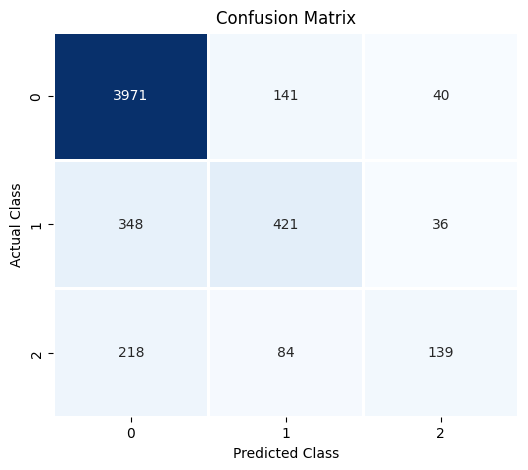

In [88]:
# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)  # FIXED: y_test comes first!

# Create heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, cbar=False)

# Labels
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()


### Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8341978510559467
              precision    recall  f1-score   support

           1       0.87      0.96      0.91      4152
           2       0.64      0.52      0.58       805
           3       0.70      0.23      0.35       441

    accuracy                           0.83      5398
   macro avg       0.74      0.57      0.61      5398
weighted avg       0.82      0.83      0.81      5398



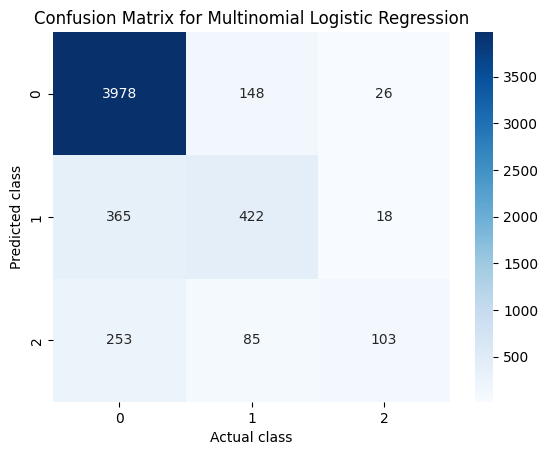

In [98]:
# Create a LogisticRegression model with the 'multinomial' solver
model_LR = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data
model_LR.fit(X_train, y_train)

# Predict on the test data
y_predict = model_LR.predict(X_test)

# Evaluate the model
print("Accuracy:", model_LR.score(X_test, y_test))
print(classification_report(y_test, y_predict))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_predict)  # Corrected order of arguments
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Predicted class')
plt.xlabel('Actual class')
plt.title("Confusion Matrix for Multinomial Logistic Regression")
plt.show()

In [99]:
# Define the parameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse)
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],  # Solver algorithms
    'max_iter': [100, 500, 1000]  # Maximum iterations for convergence
}

# Create a LogisticRegression model
model_LR = LogisticRegression(multi_class='multinomial')

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=model_LR,
    param_grid=param_grid,
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=2,  # Print details during the search
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_LR_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_predict = best_LR_model.predict(X_test)
print("Accuracy:", best_LR_model.score(X_test, y_test))
print(classification_report(y_test, y_predict))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

Accuracy: 0.8347536124490552
              precision    recall  f1-score   support

           1       0.87      0.96      0.91      4152
           2       0.64      0.53      0.58       805
           3       0.70      0.24      0.35       441

    accuracy                           0.83      5398
   macro avg       0.74      0.57      0.61      5398
weighted avg       0.82      0.83      0.82      5398



# SVM

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a LabelEncoder object for the target variable
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = svm_model.predict(X_test)

# Decode the predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.85      0.97      0.90      4187
           2       0.67      0.44      0.53       829
           3       0.84      0.15      0.26       382

    accuracy                           0.83      5398
   macro avg       0.78      0.52      0.56      5398
weighted avg       0.82      0.83      0.80      5398



In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler (optional for Random Forest)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a LabelEncoder object for the target variable
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = rf_model.predict(X_test)

# Decode the predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.85      0.96      0.90      4187
           2       0.64      0.43      0.51       829
           3       0.57      0.19      0.29       382

    accuracy                           0.83      5398
   macro avg       0.69      0.53      0.57      5398
weighted avg       0.80      0.83      0.80      5398



In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler (optional for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a LabelEncoder object for the target variable
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred_encoded = model.predict(X_test)
    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[model_name] = f1
    print(f"--- {model_name} ---")
    print(classification_report(y_test, y_pred))
    print(f"F1 Score: {f1}\n")

# Compare model performance
best_model = max(results, key=results.get)
print(f"Best Model: {best_model} with F1 Score: {results[best_model]}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


--- Logistic Regression ---
              precision    recall  f1-score   support

           1       0.87      0.96      0.91      4187
           2       0.63      0.51      0.56       829
           3       0.68      0.20      0.31       382

    accuracy                           0.83      5398
   macro avg       0.73      0.55      0.59      5398
weighted avg       0.82      0.83      0.81      5398

F1 Score: 0.8142257891976534

--- SVM ---
              precision    recall  f1-score   support

           1       0.85      0.97      0.90      4187
           2       0.67      0.44      0.53       829
           3       0.84      0.15      0.26       382

    accuracy                           0.83      5398
   macro avg       0.78      0.52      0.56      5398
weighted avg       0.82      0.83      0.80      5398

F1 Score: 0.8011692837921223

--- Random Forest ---
              precision    recall  f1-score   support

           1       0.85      0.96      0.90      4187
       

# (b)

In [22]:
df.columns


Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'stay_days', 'booking_lead', 'Total_Guests'],
      dtype='object')

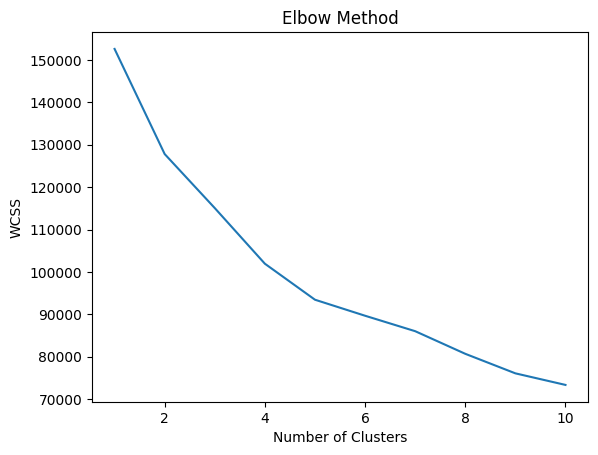

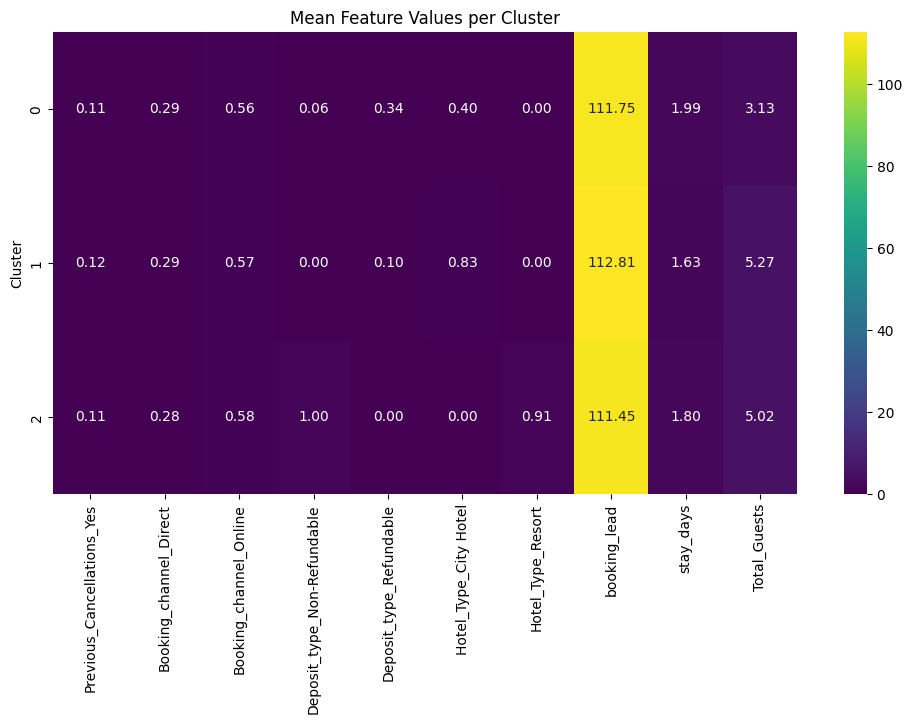

In [15]:
#  Data Preparation
features = ['Previous_Cancellations_Yes', 'Booking_channel_Direct',
            'Booking_channel_Online', 'Deposit_type_Non-Refundable',
            'Deposit_type_Refundable', 'Hotel_Type_City Hotel',
            'Hotel_Type_Resort', 'booking_lead', 'stay_days', 'Total_Guests']
X = df[features]

# Define categorical and numerical features
categorical_features = ['Previous_Cancellations_Yes', 'Booking_channel_Direct',
                        'Booking_channel_Online', 'Deposit_type_Non-Refundable',
                        'Deposit_type_Refundable', 'Hotel_Type_City Hotel',
                        'Hotel_Type_Resort']
numerical_features = ['booking_lead', 'stay_days', 'Total_Guests']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# 2. K-Means Clustering
# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(preprocessor.fit_transform(X))
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with optimal k (e.g., k=3 based on Elbow Method)
k = 3  # Adjust based on Elbow Method visualization
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(preprocessor.fit_transform(X))

# Calculate mean values of features per cluster
cluster_means = df.groupby('Cluster')[features].mean()

# Visualize cluster means using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mean Feature Values per Cluster')
plt.show()



In [16]:
# Analyze heatmap and assign labels based on feature patterns
cluster_labels = ['High-Risk', 'Loyal', 'Occasional']  # Initial labels, adjust as needed
df['Cluster_Label'] = df['Cluster'].map({i: label for i, label in enumerate(cluster_labels)})


# Print cluster sizes and mean feature values with labels:
print(df.groupby('Cluster_Label')['Cluster'].count())  # Cluster sizes
print(df.groupby('Cluster_Label')[features].mean())  # Mean feature values per cluster label

Cluster_Label
High-Risk     11567
Loyal          8309
Occasional     7114
Name: Cluster, dtype: int64
               Previous_Cancellations_Yes  Booking_channel_Direct  \
Cluster_Label                                                       
High-Risk                        0.108585                0.294458   
Loyal                            0.119750                0.288362   
Occasional                       0.114141                0.279730   

               Booking_channel_Online  Deposit_type_Non-Refundable  \
Cluster_Label                                                        
High-Risk                    0.560733                     0.059998   
Loyal                        0.567096                     0.000000   
Occasional                   0.575204                     0.999859   

               Deposit_type_Refundable  Hotel_Type_City Hotel  \
Cluster_Label                                                   
High-Risk                     0.335091               0.399499   
Loyal 

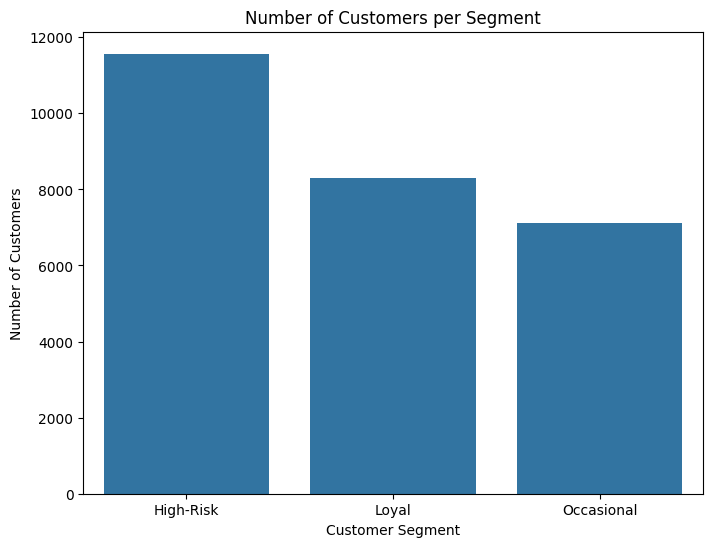

In [17]:
# Count the number of customers in each segment
segment_counts = df['Cluster_Label'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Number of Customers per Segment")
plt.show()


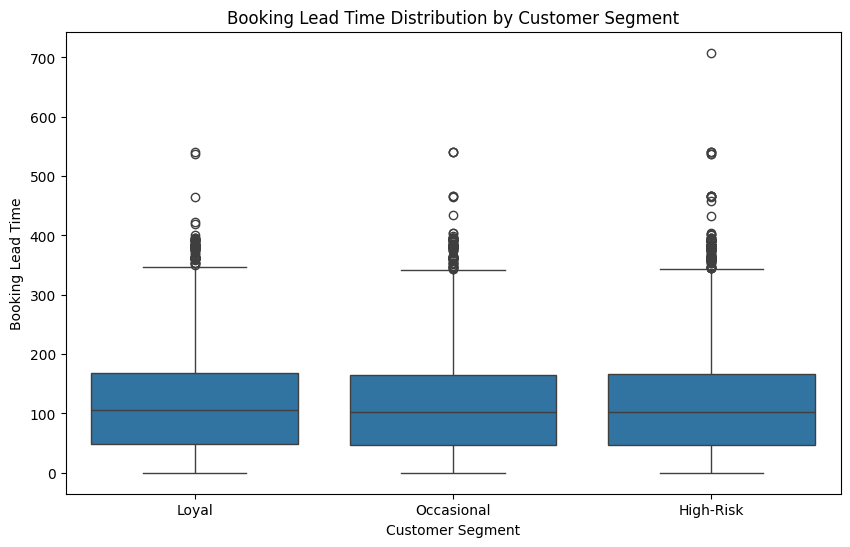

In [18]:
# Boxplot of booking_lead for each segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_Label', y='booking_lead', data=df)
plt.title('Booking Lead Time Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Booking Lead Time')
plt.show()
